# Домашнее задание №1

### **Dataset of depressive posts in Russian language collected from social media** [(paper)](https://www.sciencedirect.com/science/article/pii/S2352340920300895)

Скачать датасет в формате .tsv можно [здесь](https://yadi.sk/d/G5rq-R3AK8SOuw).


В качестве задания предлагается:
1. Использовать ```pandas``` и ряд инструментов для автоматической обработки текстов на русском языке, чтобы ответить на вопросы.
2. Написать функции для извлечения текстовых признаков.

Не рекомендуется использовать ```nltk``` для сегментации/токенизации текстов, поскольку существуют инструменты, которые выполняют свою задачу для русского значительно лучше – их мы обсуждали с вами на занятии.


**Дедлайн**: 23 сентября 23:59

In [1]:
import pandas as pd

df = pd.read_csv("depression_data.tsv", sep="\t")
df.head()

,text,label,age
0,"Когда-то я был добрым романтиком, который стре...",1,32.0
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0


### Часть 1: Простая статистика (2 балла)

Зачастую в данных, с которыми вы работаете, может быть много неприятных для обработки вещей. Например, мы видим, что в колонке ```age``` очень грязные значения.

In [2]:
df["age"].value_counts()

16.0      1823
17.0      1811
18.0      1661
15.0      1582
20.0      1543
          ... 
116.0        1
295.0        1
2425.0       1
92.0         1
830.0        1
Name: age, Length: 128, dtype: int64

1. Найдите среднее значение возраста в диапазоне от 14 до 50 лет включительно.

In [3]:
# your code and output here

need_ages_mean = df['age'][df['age']<=50][df['age']>=14].mean()
print(need_ages_mean)

22.704171601526518


2. Какую долю 16-летние авторы составляют в диапазоне от 16 до 26 лет включительно?

In [4]:
# your code and output here
av = df['age'][df['age']<=26][df['age']>=16]
all_numbers = av.value_counts().tolist()
print(av.value_counts()[16]/sum(all_numbers))


0.1259412780656304


3. Сколько в датасете текстов, авторам которых 28 или 30 лет?

In [5]:
# your code and output here
len(df['age'][df['age']==28]) + len(df['age'][df['age']==30])

1185

4. С помощью одной встроенной в ```pandas``` функции отобразите всю статистику по колонке ```age``` в диапазоне от 18 до 30 лет включительно.

In [6]:
# your code and output here
df['age'][df['age']<=30][df['age']>=18].describe()

count    13205.000000
mean        22.676638
std          3.550254
min         18.000000
25%         20.000000
50%         22.000000
75%         25.000000
max         30.000000
Name: age, dtype: float64

5. Сколько в датасете положительных / отрицательных примеров?

In [7]:
# your code and output here
df['label'].value_counts()

0    32021
1    32018
Name: label, dtype: int64

### Часть 2: Предобработка (3 балла)

1. Посчитайте количество предложений в каждом тексте. Сохраните эти значения в отдельной колонке датафрейма.

In [8]:
# your code and output here
!pip install razdel
from razdel import sentenize, tokenize

def get_num_sentences(text):
    segmented_sentences = sentenize(text)
    num_sentences = len(list(segmented_sentences))
    return num_sentences

df["len_sentence"] = df["text"].apply(get_num_sentences)

2. Напишите функцию для токенизации текста. Удалите стоп-слова.

In [11]:
import nltk
nltk.download()
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
import string

def token(text):
  table = str.maketrans('', '', string.punctuation + '«»–—')
  text = ''.join([w.translate(table) for w in text])
  text = text.lower()
  tokens = list(word_tokenize(text))
  tokens = [i for i in tokens if (i not in stop_words)]
  return tokens

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


3. Посчитайте количество токенов в тексте (без стоп-слов). Найдите среднее этих значений как по всей выборке, так и внутри каждого класса. 

In [12]:
# your code and output here
df['count_tok'] = df["text"].apply(token)

In [13]:
print(df['count_tok'][df['label'] == 1].apply(len).mean())
print(df['count_tok'][df['label'] == 0].apply(len).mean())

68.84283840339809
140.07126573186346


4. Напишите функцию, которая переводит текст в последовательность лемм.

In [16]:
# your code and output here
!pip install pymorphy2 --upgrade
!pip install pymorphy2-dicts-ru --upgrade
import pymorphy2
morph = pymorphy2.MorphAnalyzer(lang='ru-old')

def lemmat(tokens_list):
  lemmas = [morph.parse(i)[0].normal_form for i in tokens_list]
  return lemmas

Requirement already up-to-date: pymorphy2 in /usr/local/lib/python3.6/dist-packages (0.9)
Requirement already up-to-date: pymorphy2-dicts-ru in /usr/local/lib/python3.6/dist-packages (2.4.404381.4453942)


/usr/local/lib/python3.6/dist-packages/pymorphy2/analyzer.py:281: UserWarning: Dictionary language (None) doesn't match analyzer language ('ru-old').
  "analyzer language (%r)." % (dictionary.lang, lang)


In [17]:
df["count_tok"][:1].apply(lemmat)

0    [когдато, добрый, романтик, который, стремитьс...
Name: count_tok, dtype: object

5. Напишите функцию, которая переводит текст в последовательность частеречных тегов.

In [18]:
# your code and output here
def to_part_speech(lemmas_list):
  words = [morph.parse(i)[0] for i in lemmas_list]
  tags = [word.tag.POS for word in words]
  return tags
df["count_tok"][:1].apply(to_part_speech)

0    [NOUN, ADJF, NOUN, ADJF, VERB, INFN, ADJF, VER...
Name: count_tok, dtype: object

6. Какие слова мы можем добавить в список стоп-слов? Приведите примеры и объясните, почему.

In [19]:
# your code and output here
# иногда бывает полезно исключать именнованные сущности, например, если текст содержит много 
# совственных имен (в пьесах, например), и эти именна нам смещают выборку, а нам, допустим,
# интересно посмотреть на самые популярные темы для обсуждений в этой пьесе, то лучше их убрать

# если парсим, например, комментарии пользователей, то полезно убрать 
# слова типа "крч", "мб" (кажется, они несут меньше смысла, чем "хз")

### Часть 3: Визуализация (1 балл)

1. Визуализируйте распределение количество предложений / текст.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


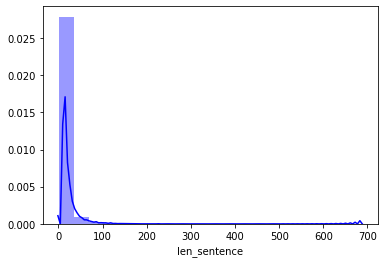

In [20]:
# your code and output here
import matplotlib.pyplot as plt
import seaborn as sns

def plot_len_dist(df, col_name):
    sns.distplot(a = df[col_name], bins=20, color="blue")
plot_len_dist(df, col_name="len_sentence")

2. Визуализируйте распределение количество-предложений / текст внутри каждого класса.

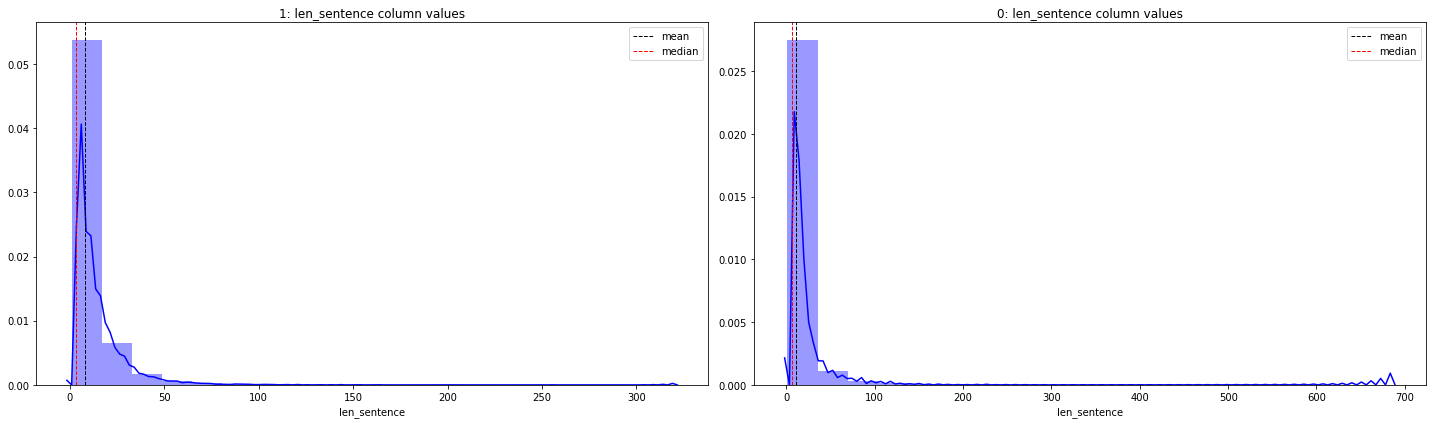

In [21]:
# your code and output here

def plot_len_dist(df, col_name):
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    for i, topic in enumerate(list(df["label"].unique())):
        topic_subset = df[df["label"] == topic][col_name]

        sns.distplot(topic_subset, bins=20, color="blue", ax=axes[i])
        axes[i].axvline(
            (topic_subset).mean(), color="k", linestyle="dashed", linewidth=1, label="mean"
        )
        axes[i].axvline(
            (topic_subset).median(), color="r", linestyle="dashed", linewidth=1, label="median"
        )
        axes[i].legend()
        axes[i].set(title="%s: %s column values" % (topic, col_name))
    
    fig.tight_layout()
plot_len_dist(df, "len_sentence")

3. Верно ли, что количество предложений в тексте коррелирует с возрастом автора в подвыборке от 16 до 32 лет включительно? Если да, какая это корреляция – положительная или отрицательная? Визуализируйте матрицу корреляции.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


                   age  len_sentence
age           1.000000      0.039647
len_sentence  0.039647      1.000000
                                                 text   age  len_sentence
1   Здраствуйте! Я каждый день просыпаюсь с мыслью...  28.0             6
2   У меня проблемы с девушкой. Каждую ссору я не ...  16.0            10
7   Начну с начала, у меня есть мама, с ней очень ...  18.0             5
9                      Этот год был очень трудным....  17.0             1
10  Мне 23.Я мама и студентка. Живу вместе с дочер...  23.0            10


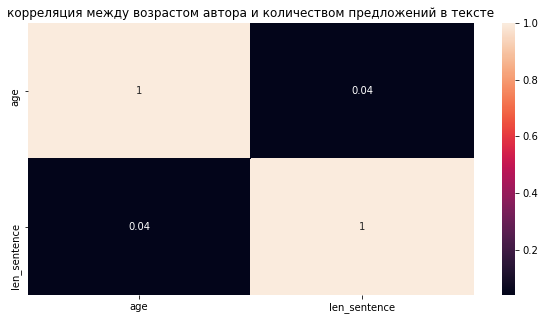

In [22]:
df_ages = df[['text', 'age', 'len_sentence']][df['age']<=30][df['age']>=16]
print(df_ages.corr())
print(df_ages.head())

# значение корреляции близко к нулю, а следовательно корреляция между возрастом 
# автора и длинной его текстов отсутствует

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(
    data=df_ages.corr(), 
    annot=True,
    ax=ax
)

plt.title("корреляция между возрастом автора и количеством предложений в тексте")
plt.show()

### Часть 4: Извлечение текстовых признаков (4 балла)

1. Самостоятельно реализуйте функцию для получения посимвольных н-грамм (без использования библиотек).

In [23]:
# your code and output here
def char_ngrams1(text, n):
  ngrams = []
  for i, letter in enumerate(text):
    if len(text[i:i+n]) == n:         # это устловие можно убрать, если мы не боимся н-грамм
      ngrams.append(text[i:i+n])      # размером меньше n в случае если количество символов в тексте
  return ngrams                       # не кратно n
text = "уставшая мама мыла грязную раму"
char_ngrams1(text, 3)

['уст',
 'ста',
 'тав',
 'авш',
 'вша',
 'шая',
 'ая ',
 'я м',
 ' ма',
 'мам',
 'ама',
 'ма ',
 'а м',
 ' мы',
 'мыл',
 'ыла',
 'ла ',
 'а г',
 ' гр',
 'гря',
 'ряз',
 'язн',
 'зну',
 'ную',
 'ую ',
 'ю р',
 ' ра',
 'рам',
 'аму']

2. Самостоятельно реализуйте функцию для получения пословных н-грамм (без использования библиотек).

In [25]:
# your code and output here
def word_ngrams1(text, n):
  if type(text) != type([]):
    text = text.split()
  ngrams = []
  for i, word in enumerate(text):
    if len(text[i:i+n]) == n:
      ngrams.append(text[i:i+n])
  return ngrams
word_ngrams1(text, 4)

[['уставшая', 'мама', 'мыла', 'грязную'], ['мама', 'мыла', 'грязную', 'раму']]

3. Самостоятельно реализуйте функцию для получения н-грамм лемм (без использования библиотек).

In [29]:
# your code and output here
def ngran_lem(text, n):
  tokens_list = token(text)
  str1 = ' '.join(lemmat(tokens_list))
  ngrams = word_ngrams1(str1, n)
  return ngrams 
ngran_lem(text, 4)

[['устать', 'мама', 'мыло', 'грязный'], ['мама', 'мыло', 'грязный', 'рам']]

4. Самостоятельно реализуйте функцию для получения н-грамм частеречных тегов (без использования библиотек).

In [31]:
# your code and output here

def pos_ngrams1(text, n):
  tokens_list = token(text)
  pos = to_part_speech(tokens_list)
  pos_ngram = word_ngrams1(pos, n)
  return pos_ngram
pos_ngrams1(text, n=2)



[['PRTF', 'NOUN'], ['NOUN', 'NOUN'], ['NOUN', 'ADJF'], ['ADJF', 'NOUN']]

5. Самостоятельно реализуйте функцию для получения частотного словаря частеречных тегов по коллекции документов.

In [32]:
# your code and output here
from collections import Counter

def make_corp(text):
  text = text.tolist()
  corpus = []
  for line in text:
    tokens_list = token(line)
    pos = to_part_speech(tokens_list)
    corpus.append(pos)
  corpus = [item for sublist in corpus for item in sublist]
  return Counter(corpus)

make_corp(df["text"][:250])

Counter({'ADJF': 2070,
         'ADJS': 325,
         'ADVB': 1422,
         'COMP': 124,
         'CONJ': 210,
         'GRND': 127,
         'INFN': 1306,
         'INTJ': 9,
         'NOUN': 6123,
         'NPRO': 286,
         'NUMR': 35,
         None: 433,
         'PRCL': 398,
         'PRED': 88,
         'PREP': 82,
         'PRTF': 45,
         'PRTS': 102,
         'VERB': 4345})

In [ ]:
# пример работы функции

corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

6. Постройте частотный словарь лемм по текстам внутри каждого класса. Найдите топ-15 лемм для текстов каждого класса. Есть ли между этими списками пересечение? Если да, сколько лемм пересекается?

In [33]:
# your code and output here
def make_corp_lemm(text):
  text = text.tolist()
  corpus = []
  for line in text:
    tokens_list = token(line)
    lemmas = lemmat(tokens_list)
    corpus.append(lemmas)
  corpus = [item for sublist in corpus for item in sublist]
  return Counter(corpus)

my_dict0 = make_corp_lemm(df['text'][df['label'] == 0][:250]).most_common(15)
my_dict1 = make_corp_lemm(df['text'][df['label'] == 1][:250]).most_common(15)
print(my_dict0)
print(my_dict1)

# пересекающиеся слова: год, это, который, свой, человек (5)

[('год', 297), ('который', 141), ('область', 133), ('казахстан', 123), ('это', 96), ('работа', 96), ('город', 90), ('россия', 89), ('район', 89), ('свой', 88), ('человек', 87), ('проект', 86), ('также', 85), ('президент', 85), ('наш', 84)]
[('хотеть', 233), ('это', 230), ('год', 204), ('жить', 197), ('мочь', 184), ('очень', 172), ('жизнь', 162), ('знать', 135), ('мой', 132), ('весь', 124), ('свой', 119), ('просто', 117), ('человек', 109), ('который', 108), ('мама', 102)]


7. Какие текстовые признаки могли бы быть полезными для решения задачи классификации на этих данных? Приведите примеры и перечислите ресурсы, которые вы бы использовали для конструирования этих признаков.

In [ ]:
# your answer text here
# количество токенов в текстах депрессивных (и нет) 
# количество предложений в текстах 
# специфичная лексика для каждого класса 
# выводы делала на основании этой домашки и тех функция, которые реализовала



